In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 최적화 문제 : 선형회귀

1. 주어진 상황에서 : $ax + b$
2. 어떤 점수가 : squared error
3. 가장 좋은 : least
4. 상황을 찾는 것입니다. : $ \alpha , \beta $

$$
(\alpha , \beta) = \arg\min_{a,b} f(x)
$$
where, 

$$ f(x) = \sum_{j=1}^{n} |Y_i - (ax_j + b)|^2$$

## Example 1
\begin{equation}
f(x) = x^2 - 4x + 6
\end{equation}

In [5]:
def f(x):
    return x**2 - 4*x + 6

# f = lambda x: x**2 - 4*x + 6

$f(x)$의 그래프를 그려보기 위해 `np.linspace`를 사용하여 `-5`부터 `5`까지 범위에서 `NumberOfPoints`개 만큼을 같은 간격으로 점을 뽑습니다.

In [3]:
NumberOfPoints = 101
x = np.linspace(-5., 5, NumberOfPoints)
print(x)

[-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7
  4.8  4.9  5. ]


In [6]:
fx = f(x)
print(fx)

[51.   49.61 48.24 46.89 45.56 44.25 42.96 41.69 40.44 39.21 38.   36.81
 35.64 34.49 33.36 32.25 31.16 30.09 29.04 28.01 27.   26.01 25.04 24.09
 23.16 22.25 21.36 20.49 19.64 18.81 18.   17.21 16.44 15.69 14.96 14.25
 13.56 12.89 12.24 11.61 11.   10.41  9.84  9.29  8.76  8.25  7.76  7.29
  6.84  6.41  6.    5.61  5.24  4.89  4.56  4.25  3.96  3.69  3.44  3.21
  3.    2.81  2.64  2.49  2.36  2.25  2.16  2.09  2.04  2.01  2.    2.01
  2.04  2.09  2.16  2.25  2.36  2.49  2.64  2.81  3.    3.21  3.44  3.69
  3.96  4.25  4.56  4.89  5.24  5.61  6.    6.41  6.84  7.29  7.76  8.25
  8.76  9.29  9.84 10.41 11.  ]


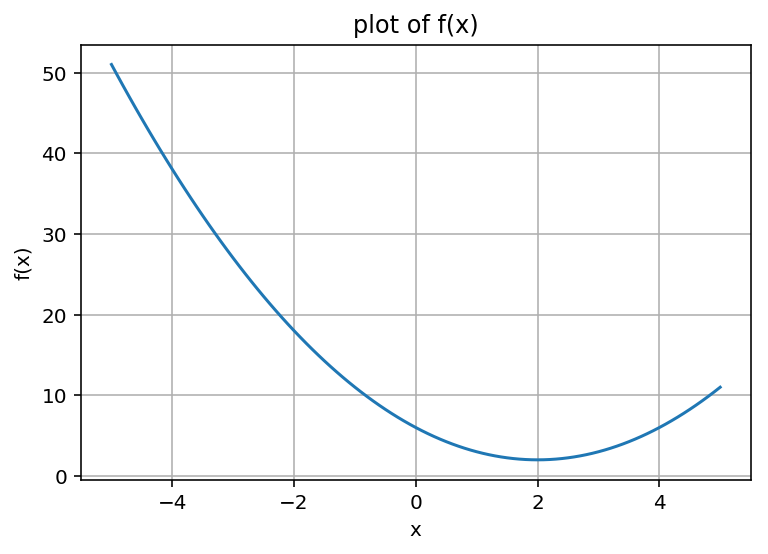

In [7]:
plt.plot(x,fx)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')
plt.show()

### 첫번째 시도 : 그냥 다 해보기(Brute Force)
모든 점을 다 계산한 후 그중에 가장 작은 값을 찾습니다.

In [8]:
xid = np.argmin(fx) # argmin 은 최소값의 index
xopt = x[xid]
print(xopt, f(xopt))

# fx 가 최소되는 x 는 2.0 , fx 최소값은 2.0

2.0 2.0


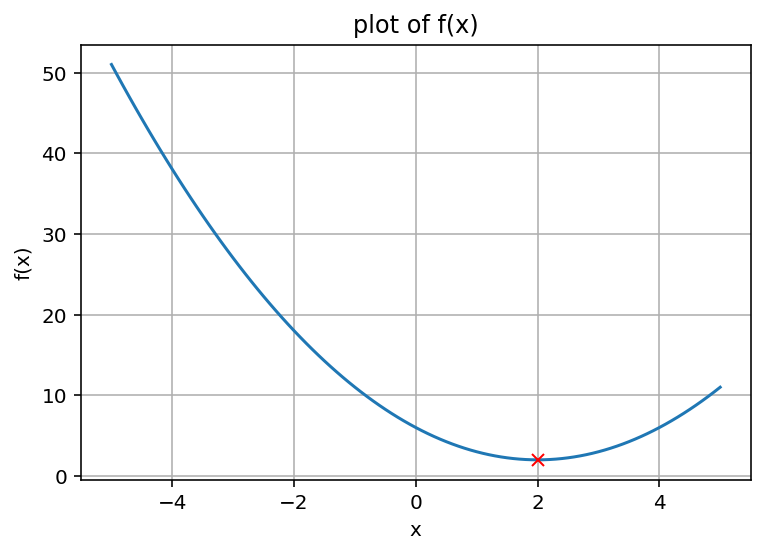

In [9]:
plt.plot(x,fx)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(xopt, f(xopt), 'xr')
plt.show()

In [10]:
def visualize(x, func):
    plt.plot(x,func(x))
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('plot of f(x)')
    plt.show()

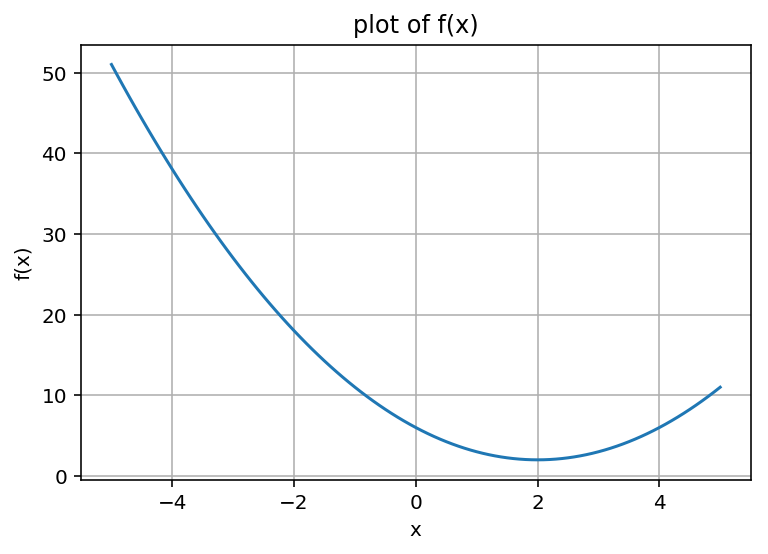

In [11]:
visualize(x, f)

### 두번째 시도 : Steepest Descent Method

With initial $x^{(0)}$, calculate the following equation :
\begin{equation}
x^{(k+1)} = x^{(k)} - \alpha \nabla f(x^{(k)})
\end{equation}

1. Define $f(x)$ : $ f(x) = x^2 - 4x + 6 $
1. Define $\nabla f(x)$
1. Tune parameters $x_0$, $\alpha$,MaxIter
1. Call `steepest_descent(,,,)`

In [12]:
def grad_fx(x):
    return 2*x - 4

In [13]:
x0 = 0.
MaxIter = 100
learning_rate = 0.01
for i in range(MaxIter):
    x1 = x0 - learning_rate * grad_fx(x0)
    print(i, x1, f(x1))
    x0 = x1
    
# 뭐에 관한 함수다? : x
# cost : f(x1)

0 0.04 5.8416
1 0.07919999999999999 5.68947264
2 0.117616 5.543369523456
3 0.15526368000000002 5.403052090327142
4 0.1921584064 5.268291227550187
5 0.228315238272 5.1388668949392
6 0.26374893350656003 5.014567765899608
7 0.29847395483642886 4.895190882369983
8 0.33250447573970027 4.780541323428132
9 0.3658543862249063 4.670431887020378
10 0.39853729850040814 4.564682784294371
11 0.4305665525304 4.4631213460363135
12 0.461955221479792 4.365581740733276
13 0.4927161170501962 4.271904703800238
14 0.5228617947091923 4.181937277529748
15 0.5524045588150084 4.095532561339571
16 0.5813564676387082 4.012549471910524
17 0.609729338285934 3.932852512822867
18 0.6375347515202153 3.8563115533150816
19 0.664784056489811 3.7828016158038045
20 0.6914883753600147 3.7122026718179737
21 0.7176586078528144 3.644399446013982
22 0.7433054356957581 3.5792812279518285
23 0.768439326981843 3.5167416913249356
24 0.7930705404422062 3.456678720348468
25 0.817209129633362 3.398994243022669
26 0.8408649470406948 3

1. func : loss function
2. grad_func : gradient

In [15]:
def steepest_descent(func, grad_func, x0, learning_rate=0.01, MaxIter=10, verbose=True):
    paths = []
    for i in range(MaxIter):
        x1 = x0 - learning_rate * grad_func(x0)
        if verbose:
            print('{0:03d} : {1:4.3f}, {2:4.2E}'.format(i, x1, func(x1)))
        x0 = x1
        paths.append(x0)
    return(x0, func(x0), paths) # 최종 결과값 리턴

In [16]:
xopt, fopt, paths = steepest_descent(f, grad_fx, 0.0, learning_rate=1.2)

000 : 4.800, 9.84E+00
001 : -1.920, 1.74E+01
002 : 7.488, 3.21E+01
003 : -5.683, 6.10E+01
004 : 12.756, 1.18E+02
005 : -13.059, 2.29E+02
006 : 23.083, 4.46E+02
007 : -27.516, 8.73E+02
008 : 43.322, 1.71E+03
009 : -55.851, 3.35E+03


In [17]:
xopt, fopt, paths

(-55.85093099519998,
 3348.73021701139,
 [4.8,
  -1.92,
  7.4879999999999995,
  -5.683199999999999,
  12.75648,
  -13.059072,
  23.082700799999998,
  -27.515781119999993,
  43.32209356799999,
  -55.85093099519998])

#### Cost function
path 로 나온 x 를 f(x) 에 넣은 것

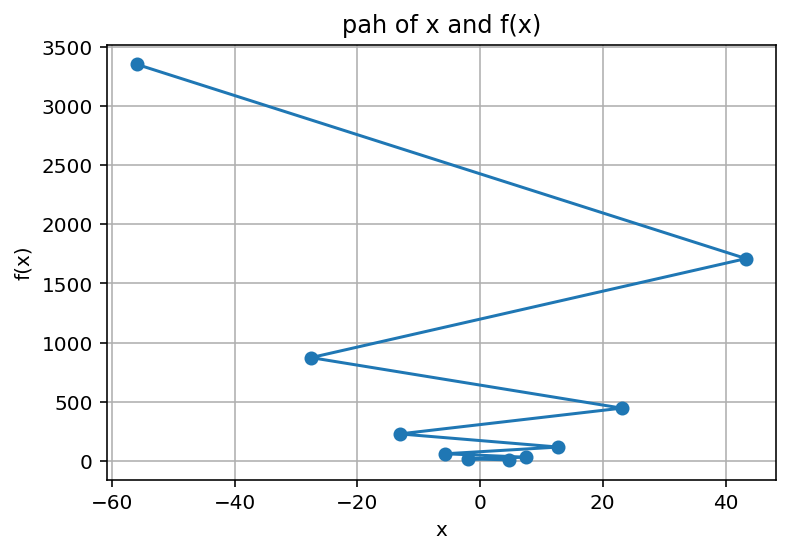

In [18]:
# x = np.linspace(0.5, 2.5, 1000)
paths = np.array(paths)
# plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('pah of x and f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

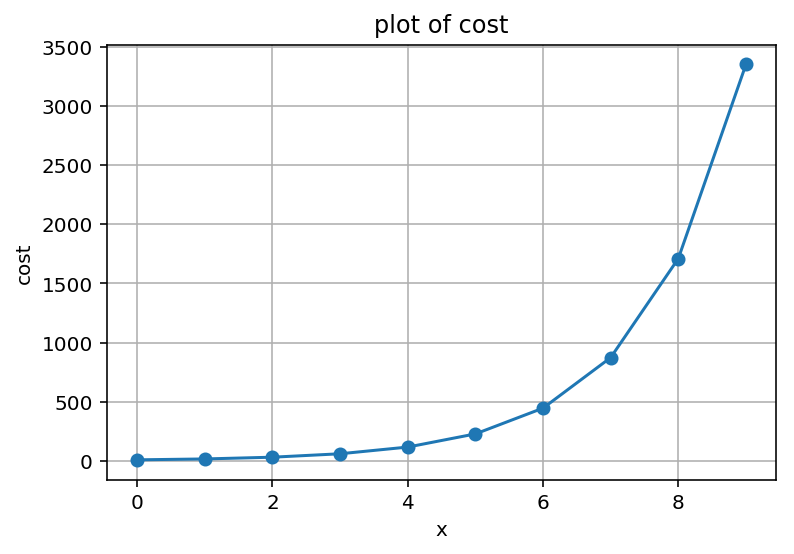

In [19]:
plt.plot(f(paths), 'o-')
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

In [20]:
# 초기값을 1.0 으로 주고, learning_rate 를 조금 낮춰 본다.
xopt, fopt, paths = steepest_descent(f, grad_fx, 1.0, learning_rate=1)

000 : 3.000, 3.00E+00
001 : 1.000, 3.00E+00
002 : 3.000, 3.00E+00
003 : 1.000, 3.00E+00
004 : 3.000, 3.00E+00
005 : 1.000, 3.00E+00
006 : 3.000, 3.00E+00
007 : 1.000, 3.00E+00
008 : 3.000, 3.00E+00
009 : 1.000, 3.00E+00


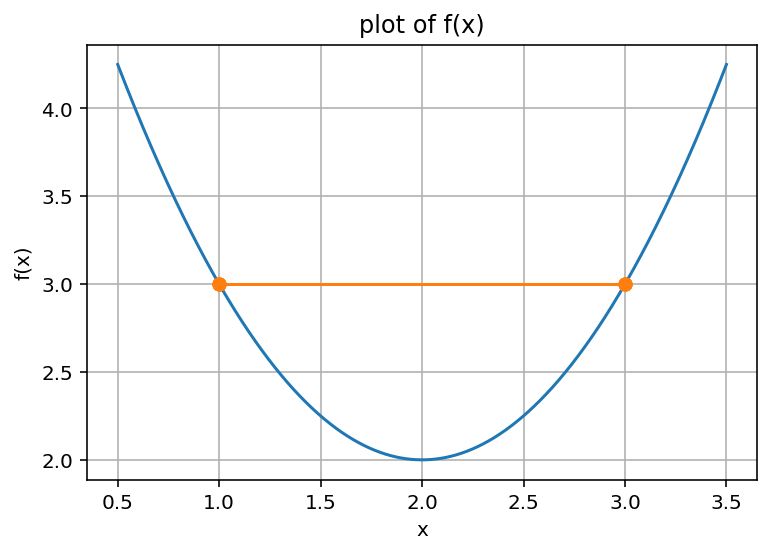

In [21]:
# cost 3 에서 갖혀버린 모습임. lerning_rate 를 더 낮춰서 볼 필요가 있음.
x = np.linspace(0.5, 3.5, 1000)
paths = np.array(paths)
plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

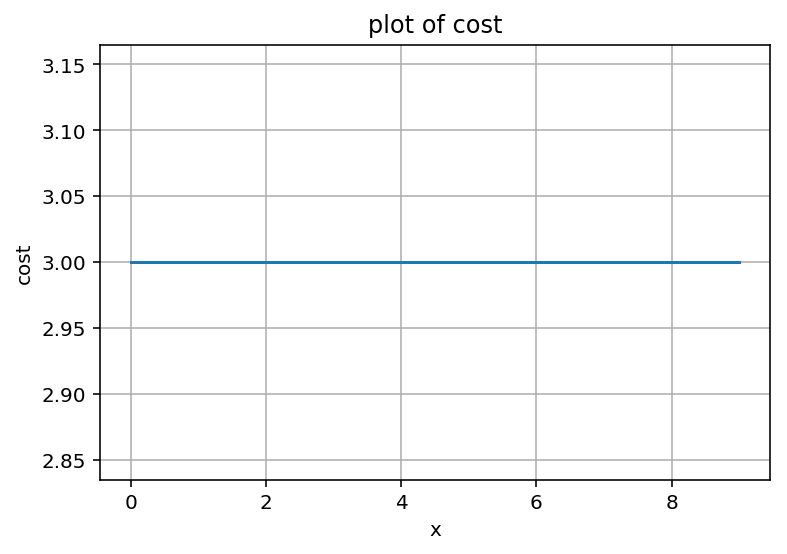

In [22]:
# cost 는 3에서 변하지 않음
plt.plot(f(paths))
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

In [23]:
# 초기값은 1.0 으로 유지하고, learning_rate 를 많이 낮춘다.
xopt, fopt, paths = steepest_descent(f, grad_fx, 1.0, learning_rate=0.001)

000 : 1.002, 3.00E+00
001 : 1.004, 2.99E+00
002 : 1.006, 2.99E+00
003 : 1.008, 2.98E+00
004 : 1.010, 2.98E+00
005 : 1.012, 2.98E+00
006 : 1.014, 2.97E+00
007 : 1.016, 2.97E+00
008 : 1.018, 2.96E+00
009 : 1.020, 2.96E+00


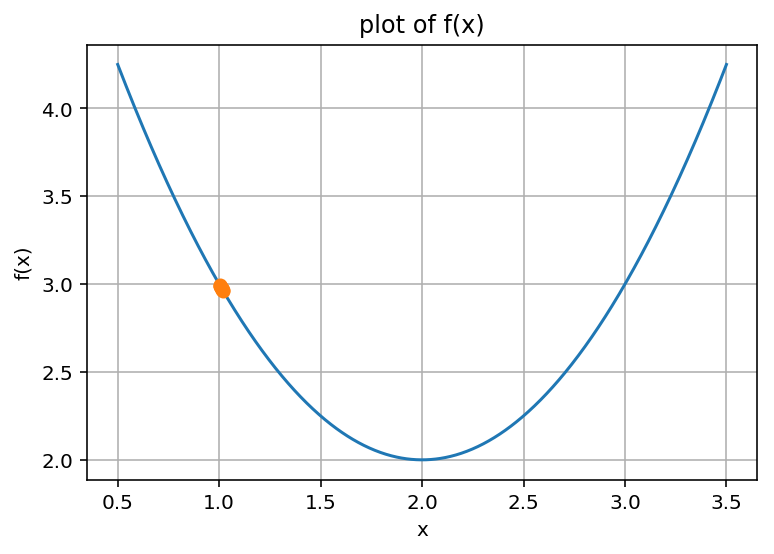

In [24]:
# 이번에는 learning_rate 가 너무 낮아서 초기값 근처에서 변하지를 않는 모습임
x = np.linspace(0.5, 3.5, 1000)
paths = np.array(paths)
plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

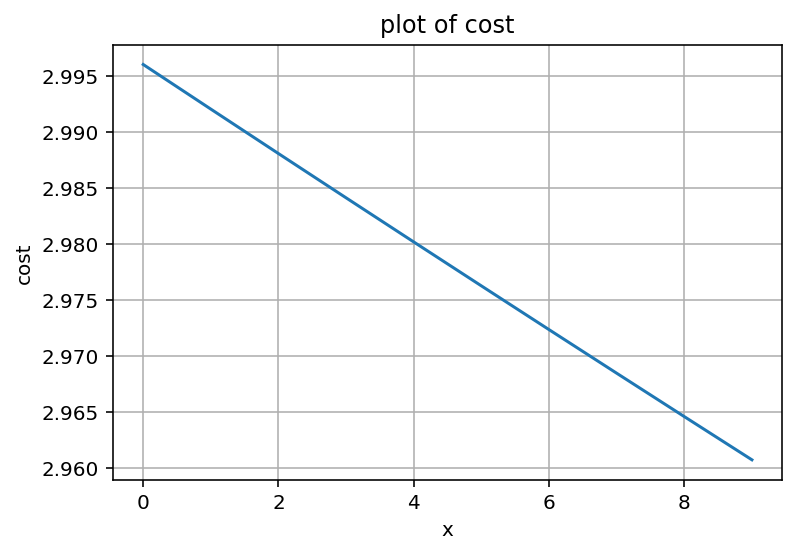

In [25]:
# cost 는 미세하게 낮아지고 있음
plt.plot(f(paths))
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

In [26]:
# 초기값을 3.0 으로 변경, learning_rate 를 0.9 로 다시 올린다.
xopt, fopt, paths = steepest_descent(f, grad_fx, 3.0, learning_rate=0.9)

000 : 1.200, 2.64E+00
001 : 2.640, 2.41E+00
002 : 1.488, 2.26E+00
003 : 2.410, 2.17E+00
004 : 1.672, 2.11E+00
005 : 2.262, 2.07E+00
006 : 1.790, 2.04E+00
007 : 2.168, 2.03E+00
008 : 1.866, 2.02E+00
009 : 2.107, 2.01E+00


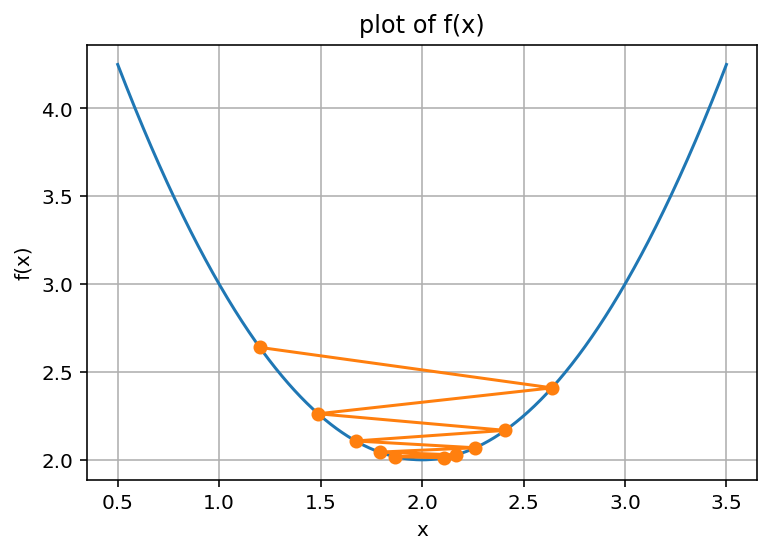

In [27]:
# 안정적으로 수렴하는 모습이 포착됨
x = np.linspace(0.5, 3.5, 1000)
paths = np.array(paths)
plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

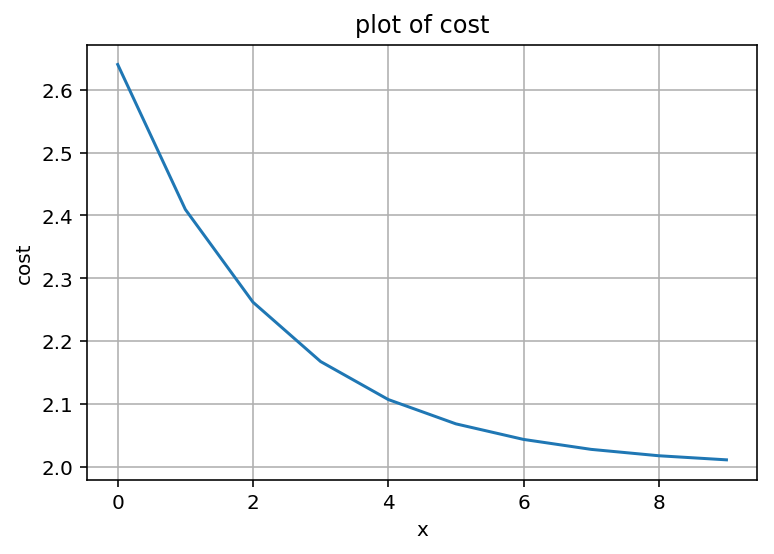

In [28]:
# cost 가 이 모양이 나오는게 정석임
plt.plot(f(paths))
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

In [30]:
xopt, fopt, paths = steepest_descent(f, grad_fx, 3.0, learning_rate=1.1)

000 : 0.800, 3.44E+00
001 : 3.440, 4.07E+00
002 : 0.272, 4.99E+00
003 : 4.074, 6.30E+00
004 : -0.488, 8.19E+00
005 : 4.986, 1.09E+01
006 : -1.583, 1.48E+01
007 : 6.300, 2.05E+01
008 : -3.160, 2.86E+01
009 : 8.192, 4.03E+01


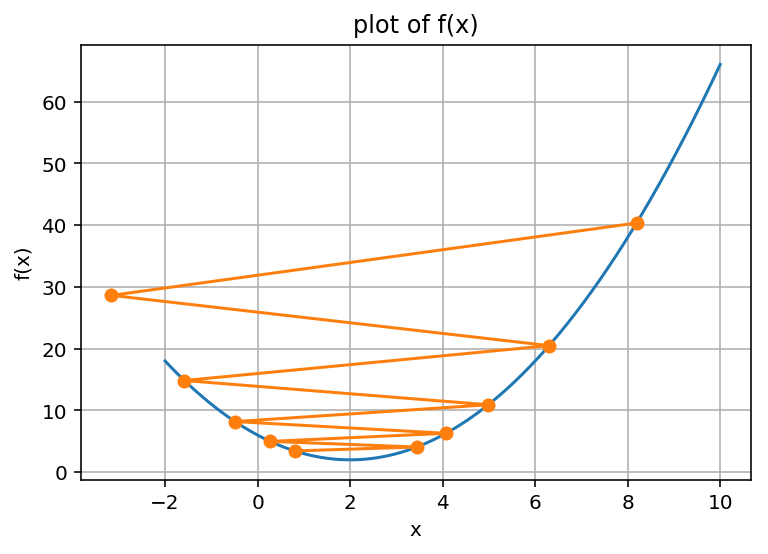

In [31]:
# learning rate가 커서 발산하는 case
x = np.linspace(-2, 10, 1000)
paths = np.array(paths)
plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

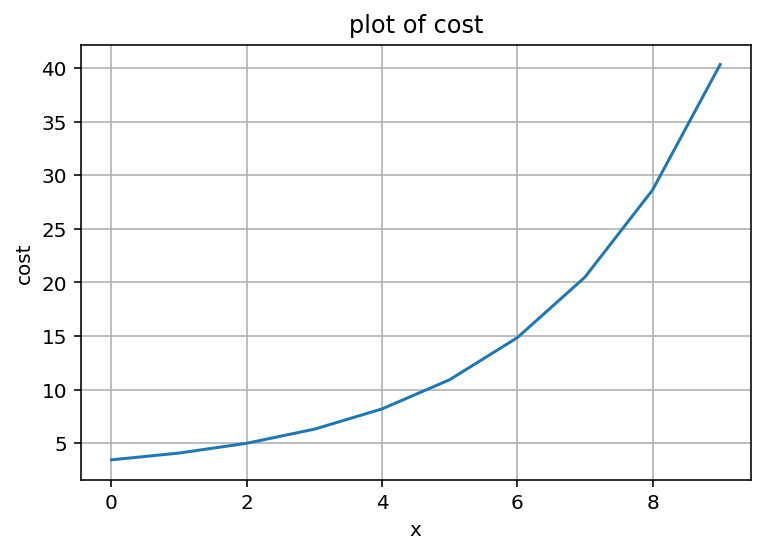

In [32]:
plt.plot(f(paths))
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

In [33]:
from scipy.optimize import minimize

In [49]:
f = lambda x: x**2 - 4*x + 6
x0 = 0.
minimize(f, x0)

# x: array([2.00000002]) 에서
# fun(cost, 최적화 값): 2.0 으로
# Optimization terminated successfully

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.00000002])

In [50]:
res = minimize(f, x0)
print(res.x, res.fun)

[2.00000002] 2.0


## (Additional) non-convex function
\begin{equation}
\min_x x \sin(x)
\end{equation}

1. Define $f(x)$ : $f(x) = x \sin(x)$
1. Define $\nabla f(x)$
1. Tune parameters $x_0$, $\alpha$,MaxIter
1. Call `steepest_descent(,,,)`

In [31]:
x = np.linspace(-2, 8, 501)
f = lambda x : x * np.sin(x)
fx = f(x)

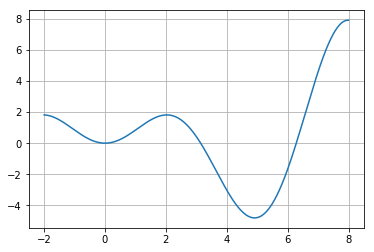

In [32]:
plt.plot(x, fx)
plt.grid()
plt.show()

In [58]:
# Calculate gradient
grad_f = lambda x: np.sin(x) + x * np.cos(x)

In [59]:
x0 = 1.5
xopt, fopt, paths = steepest_descent(f, grad_f, x0, learning_rate=0.5)

000 : 0.948, 7.70E-01
001 : 0.266, 6.97E-02
002 : 0.006, 3.85E-05
003 : 0.000, 6.36E-15
004 : 0.000, 2.52E-44
005 : 0.000, 0.00E+00
006 : 0.000, 0.00E+00
007 : 0.000, 0.00E+00
008 : 0.000, 0.00E+00
009 : 0.000, 0.00E+00


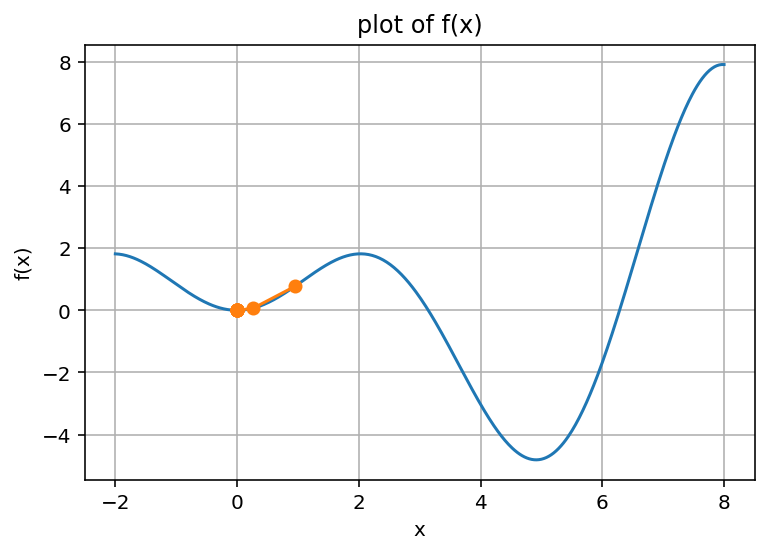

In [60]:
# Non-convex 이기 때문에, Local Minimum 에 빠진 것을 볼 수 있다.
paths = np.array(paths)
plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

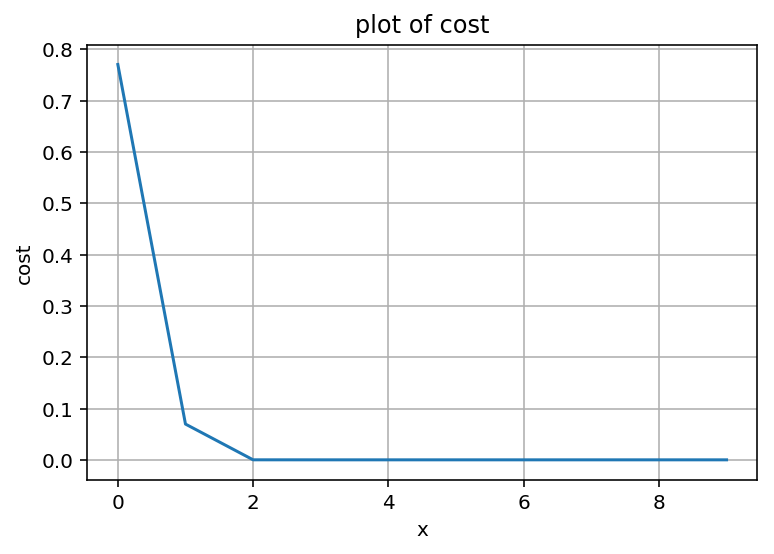

In [61]:
plt.plot(f(paths))
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

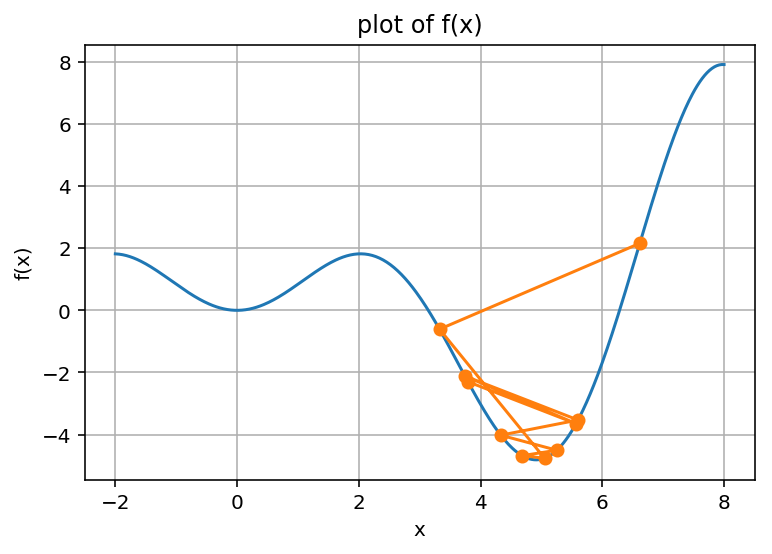

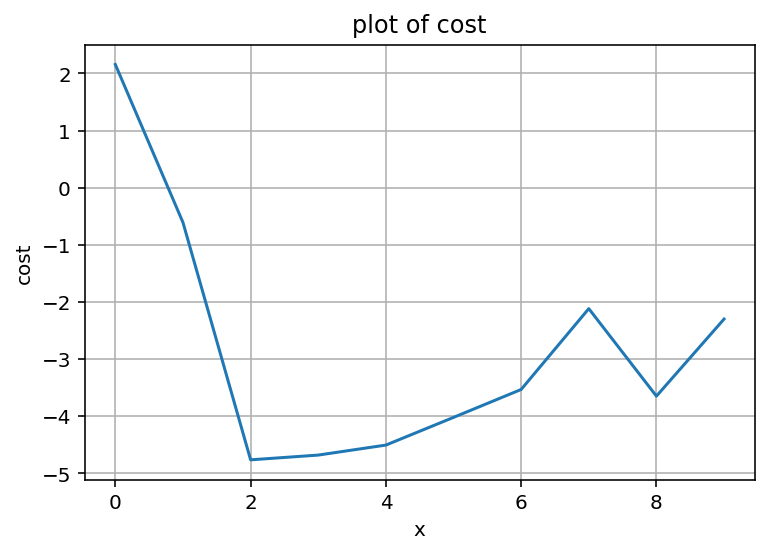

In [63]:
x0 = 7.7
MaxIter = 10
learning_rate = 0.5

xopt, fopt, paths = steepest_descent(f, grad_f, x0, learning_rate=learning_rate, MaxIter=MaxIter, verbose=False)
paths = np.array(paths)
plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()
plt.plot(f(paths))
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

# 폭이 너무 커서 내려갔다가 다시 팅겨져 올라가는 모양이 나옴. learning_rate 감소할 것

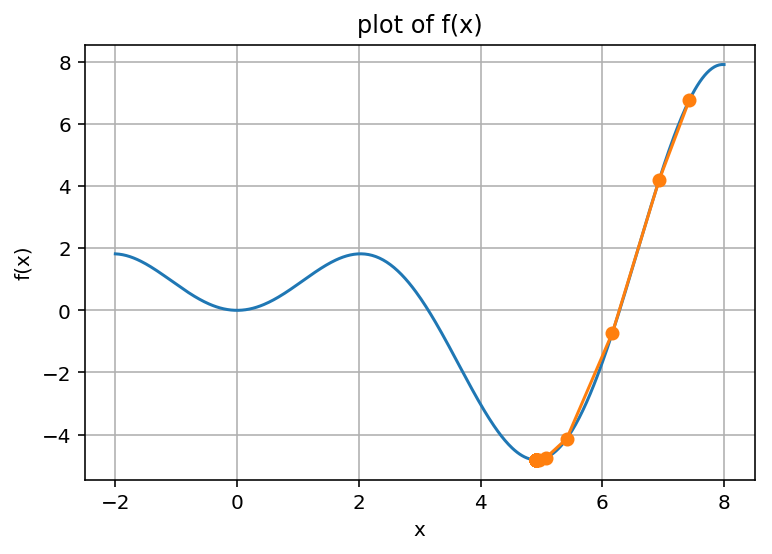

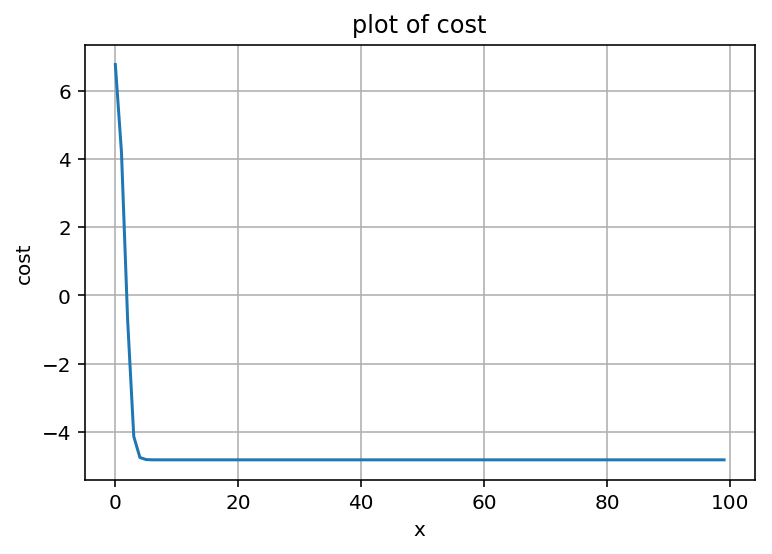

In [65]:
x0 = 7.7
MaxIter = 100
learning_rate = 0.125

xopt, fopt, paths = steepest_descent(f, grad_f, x0, learning_rate=learning_rate, MaxIter=MaxIter, verbose=False)
paths = np.array(paths)
plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()
plt.plot(f(paths))
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

# 수렴이 성공적으로 되었다.

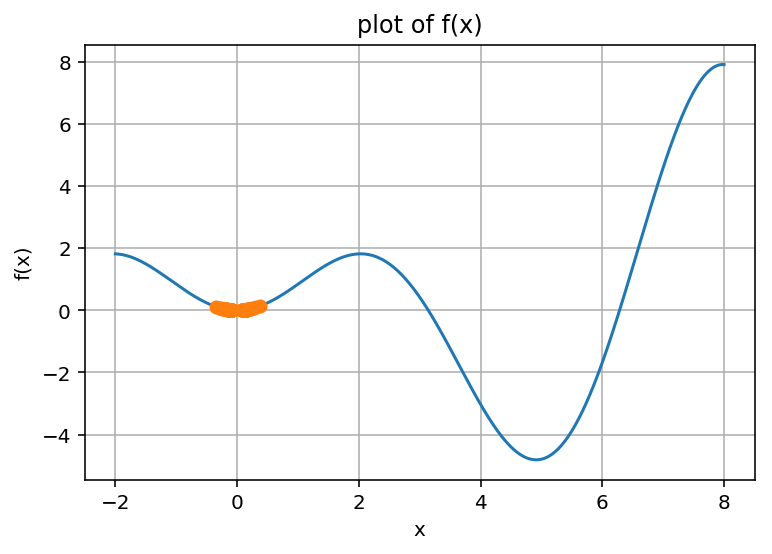

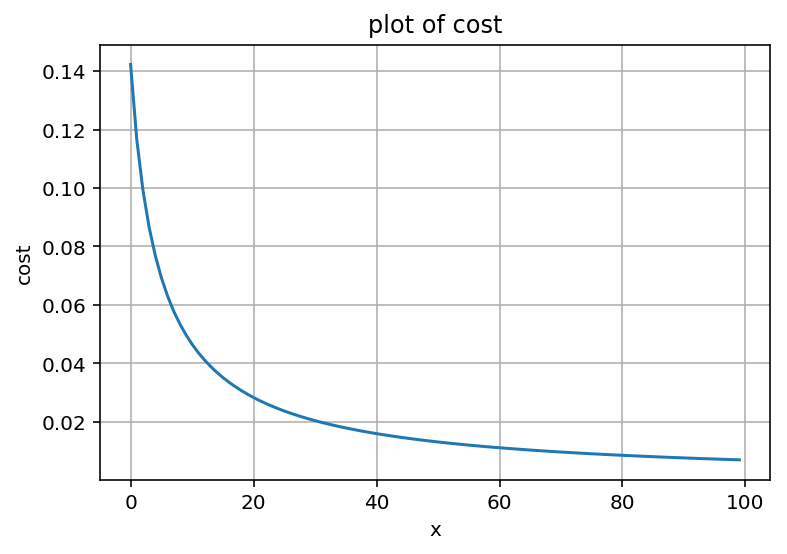

In [59]:
x0 = -1.0
MaxIter = 100
learning_rate = 1.0

xopt, fopt, paths = steepest_descent(f, grad_f, x0, learning_rate=learning_rate, MaxIter=MaxIter, verbose=False)
paths = np.array(paths)
plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()
plt.plot(f(paths))
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

# 초기값을 잘못 잡아서 Local Minimum 에 빠진 경우

## Example 02
\begin{equation}
f(x, y) = (x-2)^2 + (y-2)^2
\end{equation}

1. Define $f(x,y)$ : $ f(x, y) = (x-2)^2 + (y-2)^2$
1. Define $\nabla f$ : x, y 에 관해 2개가 필요
1. Tune parameters $x_0, y_0$, $\alpha$,MaxIter
1. Call `steepest_descent(,,,)`

2D 의 경우 최급하강법 적용

Contour

In [60]:
xmin, xmax, xstep = -4.0, 4.0, .25
ymin, ymax, ystep = -4.0, 4.0, .25

In [62]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [68]:
f = lambda x,y : (x-2)**2 + (y-2)**2

In [69]:
z = f(x, y)

In [70]:
minima = np.array([2., 2.])

In [71]:
f(*minima)

0.0

In [67]:
minima_ = minima.reshape(-1, 1)
minima_

array([[2.],
       [2.]])

In [68]:
from visualize import surf

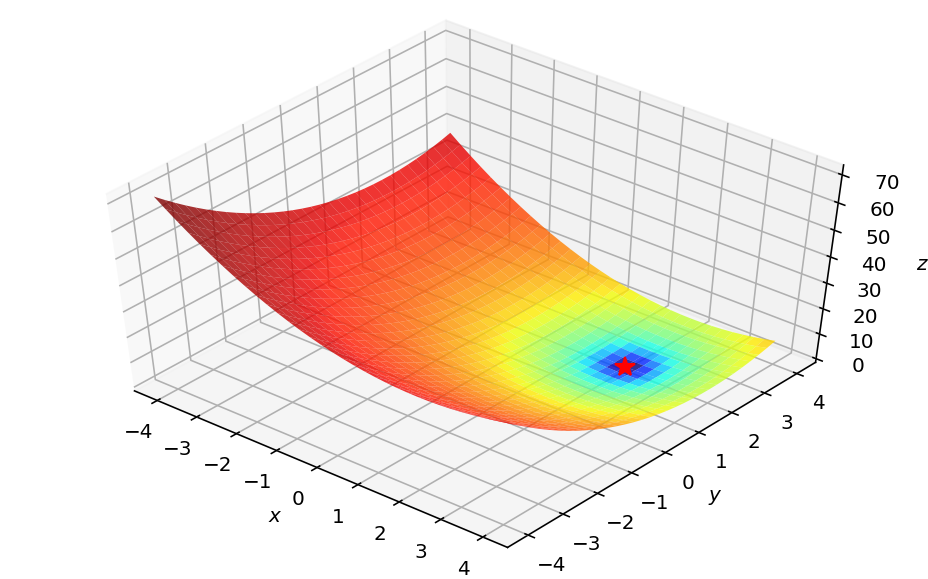

In [69]:
surf(f, x, y, minima=minima_)

In [70]:
from visualize import contour_with_quiver

In [71]:
grad_f_x = lambda x, y: 2 * (x-2)
grad_f_y = lambda x, y: 2 * (y-2)

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1537: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


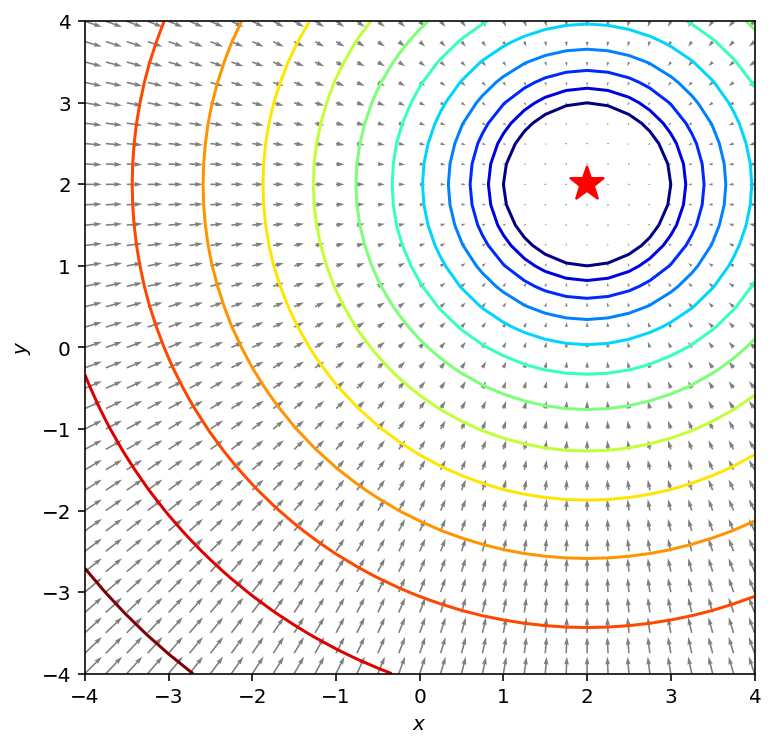

In [72]:
contour_with_quiver(f, x, y, grad_f_x, grad_f_y, minima=minima_)

In [79]:
x0 = np.array([-2., -2.])
MaxIter = 10
learning_rate = .25
for i in range(MaxIter):
    grad = np.array([grad_f_x(*x0), grad_f_y(*x0)])
    x1 = x0 - learning_rate * grad
    fval = f(*x1)
    print(i, x1, fval)
    x0 = x1

0 [0. 0.] 8.0
1 [1. 1.] 2.0
2 [1.5 1.5] 0.5
3 [1.75 1.75] 0.125
4 [1.875 1.875] 0.03125
5 [1.9375 1.9375] 0.0078125
6 [1.96875 1.96875] 0.001953125
7 [1.984375 1.984375] 0.00048828125
8 [1.9921875 1.9921875] 0.0001220703125
9 [1.99609375 1.99609375] 3.0517578125e-05


In [73]:
def steepest_descent_twod(func, gradx, grady, x0, MaxIter=10, learning_rate=0.25, verbose=True):
    paths = [x0]
    fval_paths = [f(x0[0], x0[1])]
    for i in range(MaxIter):
        grad = np.array([grad_f_x(*x0), grad_f_y(*x0)]) # 각 scalar 를 반환
        x1 = x0 - learning_rate * grad
        fval = f(*x1) # [x,y] 들어간 cost 
        if verbose:
            print(i, x1, fval) # i, [w0, w1], cost
        x0 = x1
        paths.append(x0) # [w0,w1] 형태
        fval_paths.append(fval) # cost : scalar
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

In [74]:
x0 = np.array([-2., -2.])
xopt, fopt, paths, fval_paths = steepest_descent_twod(f, grad_f_x, grad_f_y, x0)

0 [0. 0.] 8.0
1 [1. 1.] 2.0
2 [1.5 1.5] 0.5
3 [1.75 1.75] 0.125
4 [1.875 1.875] 0.03125
5 [1.9375 1.9375] 0.0078125
6 [1.96875 1.96875] 0.001953125
7 [1.984375 1.984375] 0.00048828125
8 [1.9921875 1.9921875] 0.0001220703125
9 [1.99609375 1.99609375] 3.0517578125e-05


In [76]:
print(xopt)
print(fopt)
print(paths)
print(fval_paths)

[1.99609375 1.99609375]
3.0517578125e-05
[[-2.          0.          1.          1.5         1.75        1.875
   1.9375      1.96875     1.984375    1.9921875   1.99609375]
 [-2.          0.          1.          1.5         1.75        1.875
   1.9375      1.96875     1.984375    1.9921875   1.99609375]]
[3.20000000e+01 8.00000000e+00 2.00000000e+00 5.00000000e-01
 1.25000000e-01 3.12500000e-02 7.81250000e-03 1.95312500e-03
 4.88281250e-04 1.22070312e-04 3.05175781e-05]


In [77]:
from visualize import contour_with_path

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1537: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


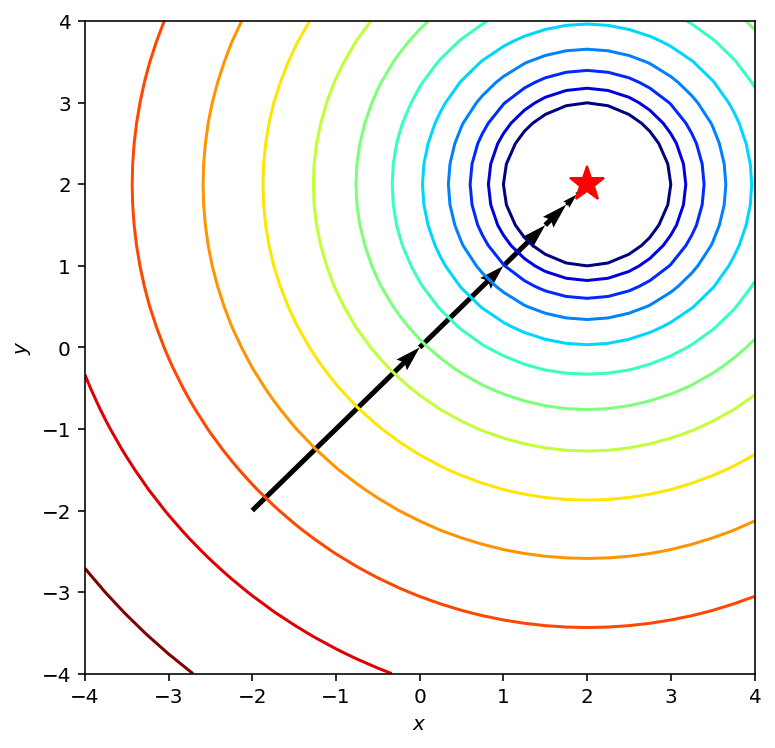

In [78]:
contour_with_path(f, x, y, paths, minima=np.array([[2],[2]]))

## Example 03
\begin{equation}
f(x, y) = 3(x-2)^2 + (y-2)^2
\end{equation}

In [79]:
f = lambda x,y : 3*(x-2)**2 + (y-2)**2

In [80]:
grad_f_x = lambda x, y: 6 * (x-2)
grad_f_y = lambda x, y: 2 * (y-2)

In [82]:
from numerical_optimizers import steepest_descent_2d
xopt, fopt, paths, fval_paths = steepest_descent_2d(f, grad_f_x, grad_f_y, x0)

0 [-2. -2.] 64.0
1 [4. 0.] 16.0
2 [1. 1.] 4.0
3 [2.5 1.5] 1.0
4 [1.75 1.75] 0.25
5 [2.125 1.875] 0.0625
6 [1.9375 1.9375] 0.015625
7 [2.03125 1.96875] 0.00390625
8 [1.984375 1.984375] 0.0009765625
9 [2.0078125 1.9921875] 0.000244140625


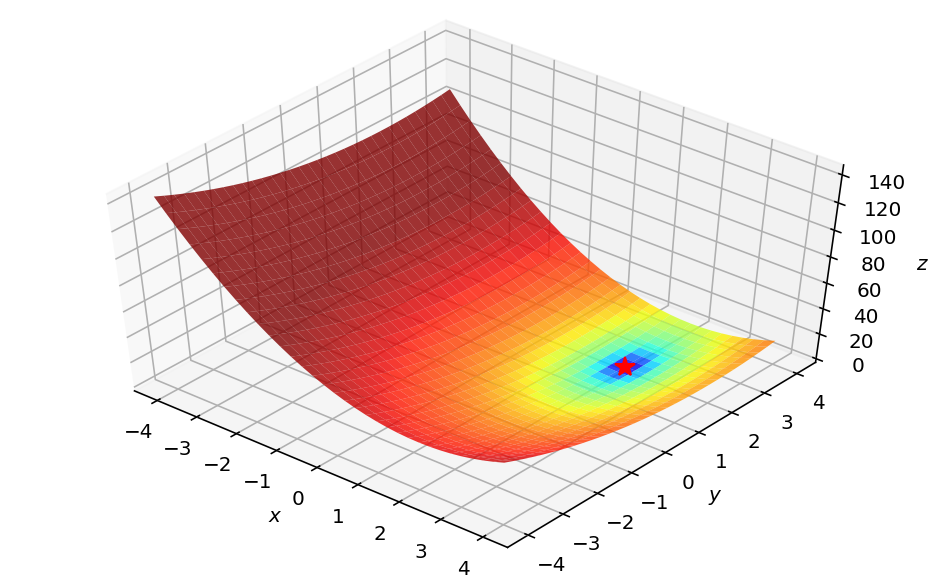

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1537: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


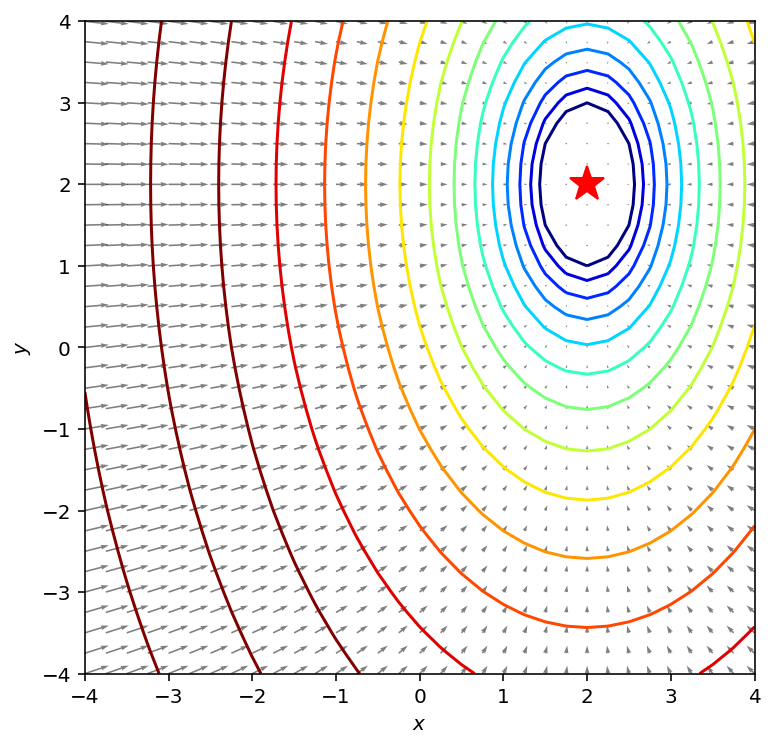

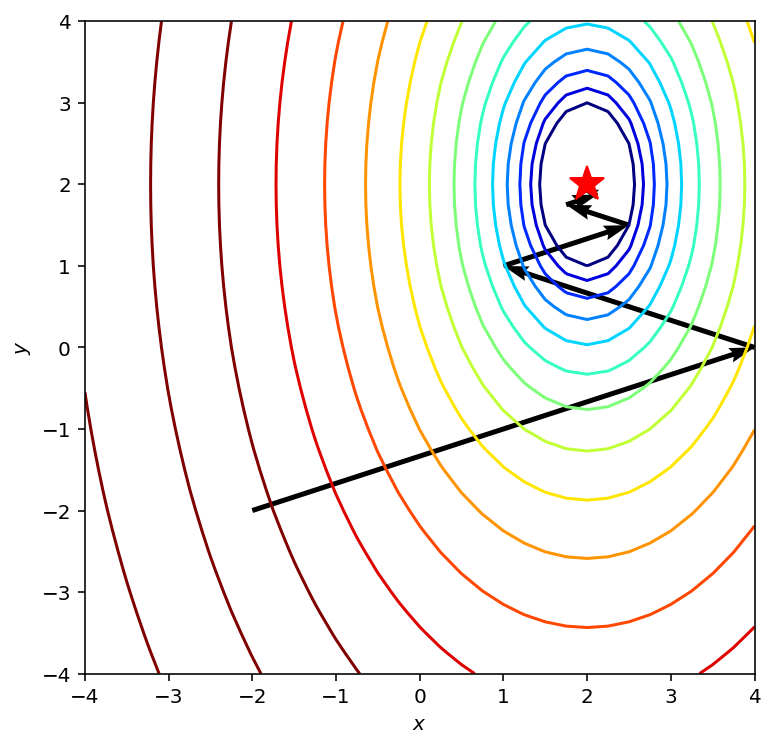

In [83]:
surf(f, x, y, minima=minima_)
contour_with_quiver(f, x, y, grad_f_x, grad_f_y, minima=minima_)
contour_with_path(f, x, y, paths, minima=np.array([[2],[2]]))

## Example 04
\begin{equation}
f(x, y) = 3(x-2)^2 + (y-2)^4
\end{equation}

In [84]:
f = lambda x,y : 3*(x-2)**2 + (y-2)**4

grad_f_x = lambda x, y: 6 * (x-2)
grad_f_y = lambda x, y: 4 * (y-2)**3

x0 = np.array([-2., -2.])
learning_rate = 0.01

xopt, fopt, paths, fval_paths = steepest_descent_2d(f, grad_f_x, grad_f_y, x0, 
                                                    learning_rate=learning_rate, MaxIter=200, verbose=False)

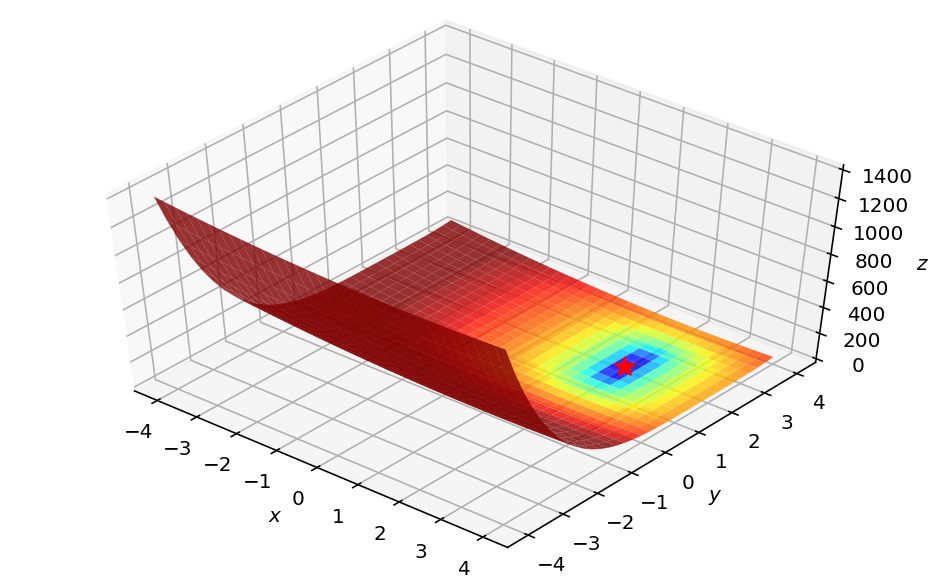

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1537: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


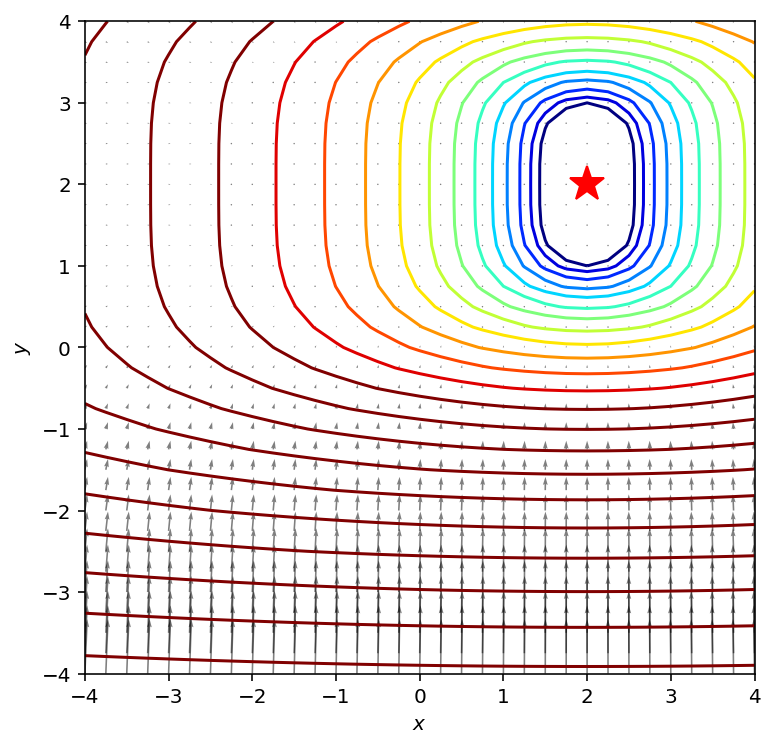

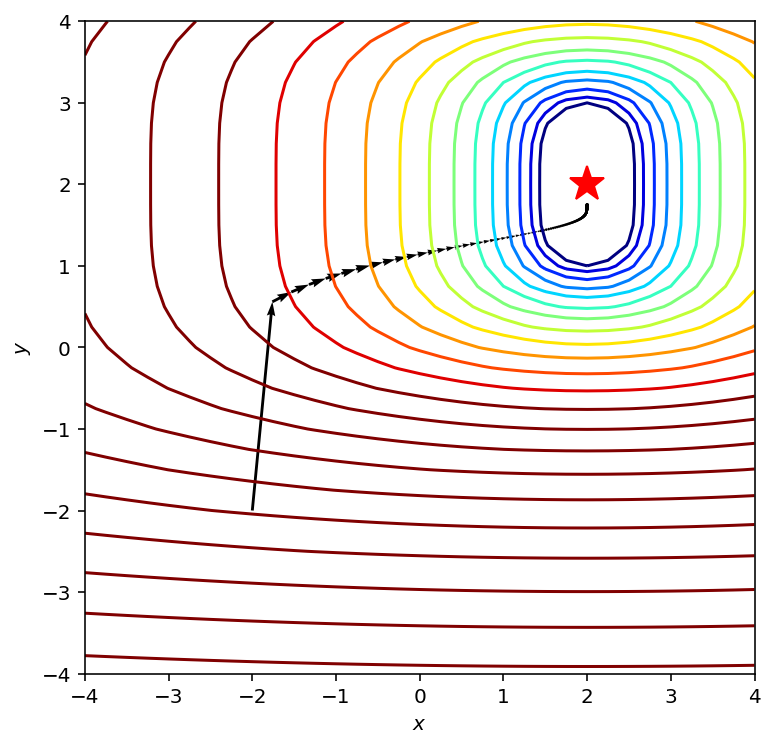

In [85]:
surf(f, x, y, minima=minima_)
contour_with_quiver(f, x, y, grad_f_x, grad_f_y, minima=minima_)
contour_with_path(f, x, y, paths, minima=np.array([[2],[2]]))

## Example 05
\begin{equation}
f(x,y) = \sin(2\pi x)\sin(2\pi x)
\end{equation}

In [86]:
xmin, xmax, xstep = -4.0, 4.0, .0625
ymin, ymax, ystep = -4.0, 4.0, .0625
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [87]:
f = lambda x,y : np.sin(np.pi*x) * np.sin(np.pi*y)

grad_f_x = lambda x, y: np.pi*np.cos(np.pi*x) * np.sin(np.pi*y)
grad_f_y = lambda x, y: np.pi * np.sin(np.pi*x) * np.cos(np.pi*y)

learning_rate = 0.01
xopt, fopt, paths, fval_paths = steepest_descent_2d(f, grad_f_x, grad_f_y, x0, 
                                                    learning_rate=learning_rate, MaxIter=200, verbose=False)

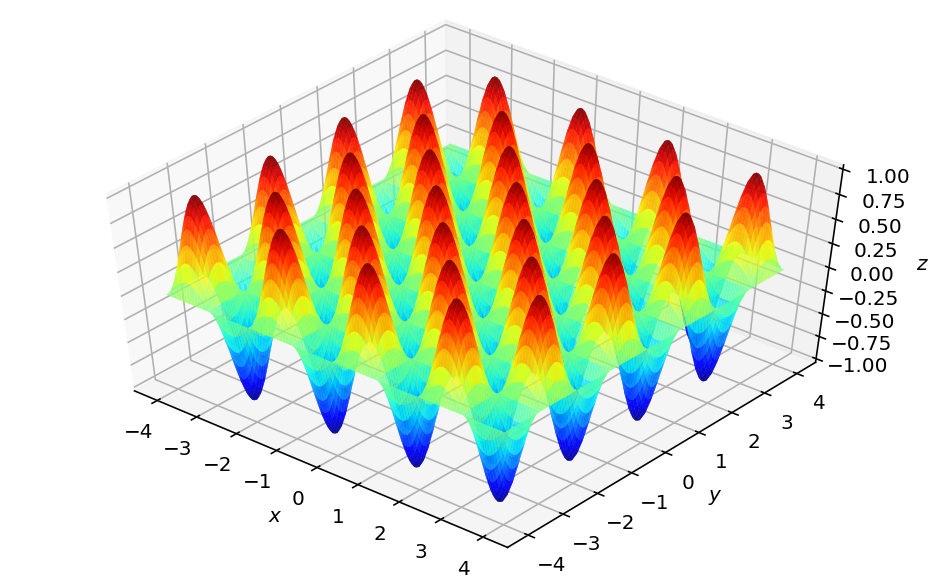

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1537: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


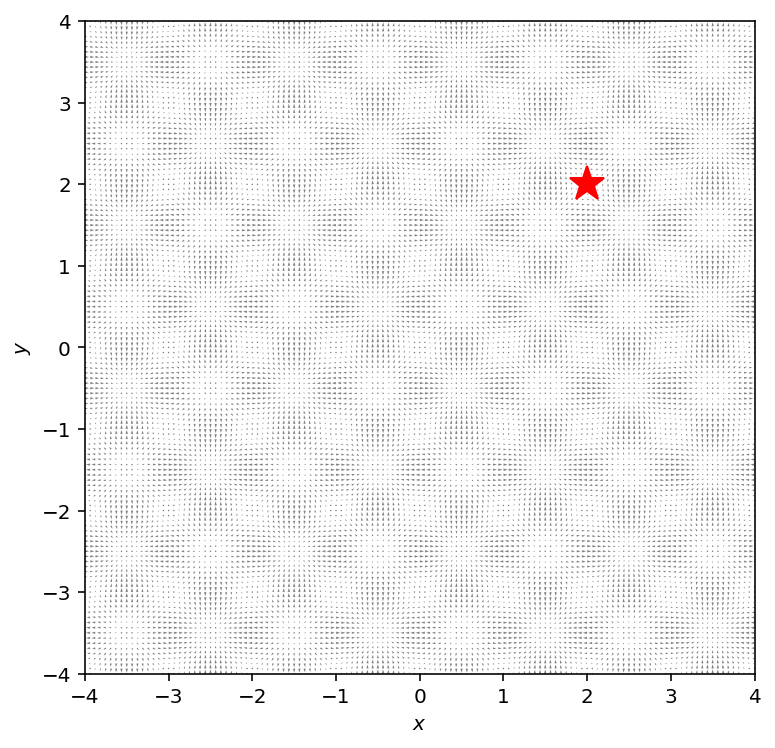

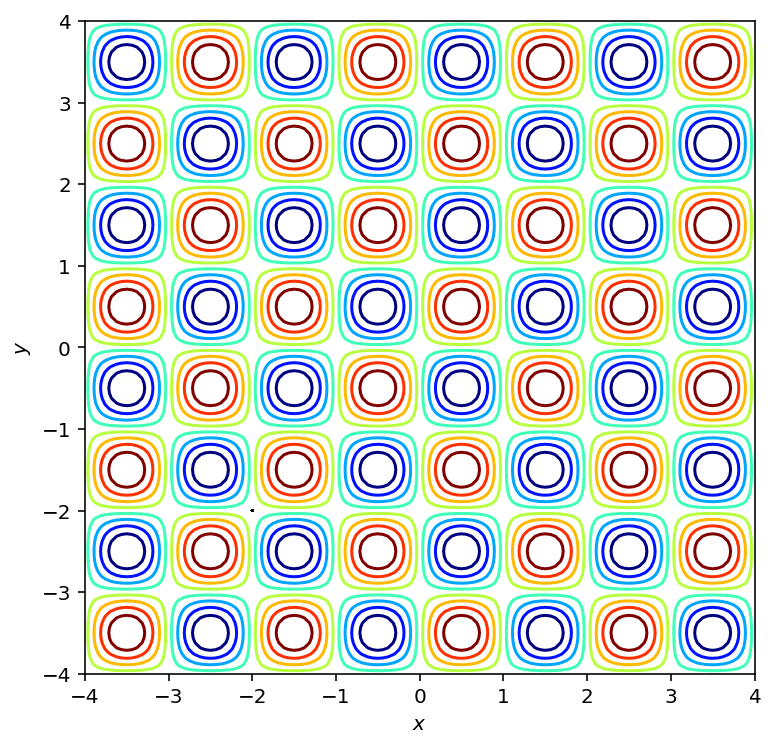

In [88]:
surf(f, x, y, norm=None)
contour_with_quiver(f, x, y, grad_f_x, grad_f_y, minima=minima_)
contour_with_path(f, x, y, paths, norm=None, level=np.linspace(-1, 1, 10))

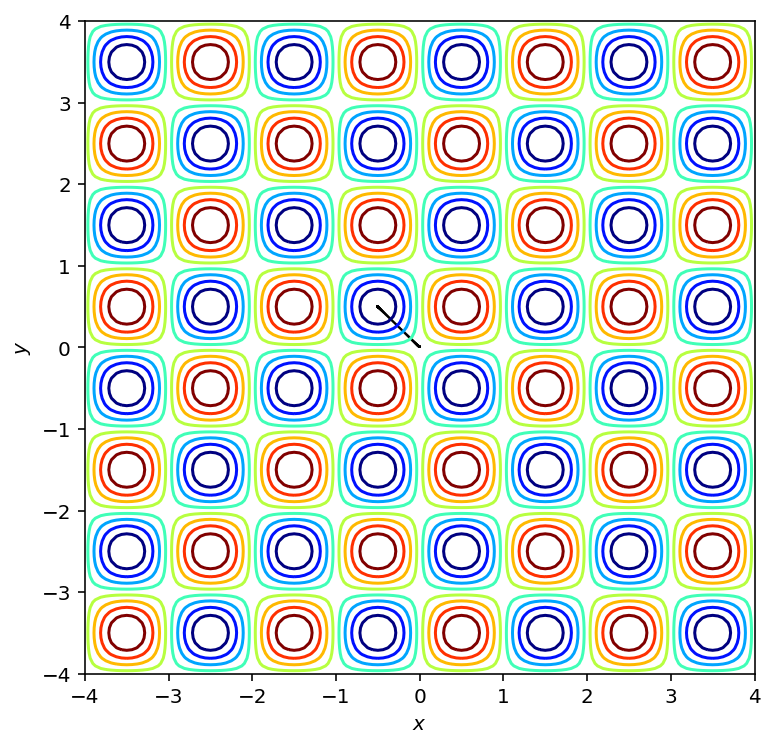

(array([-0.49999997,  0.49999997]), -0.9999999999999893)

In [89]:
x0 = np.array([0, 0.01])
xopt, fopt, paths, fval_paths = steepest_descent_2d(f, grad_f_x, grad_f_y, x0, 
                                                    learning_rate=learning_rate, MaxIter=200, verbose=False)
contour_with_path(f, x, y, paths, norm=None, level=np.linspace(-1, 1, 10))
xopt, fopt

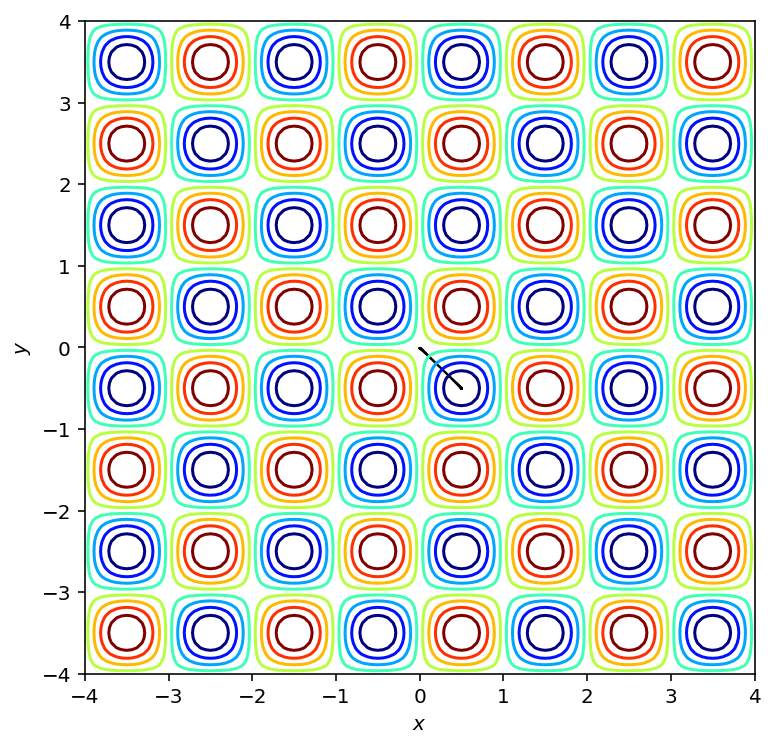

[ 0.49999997 -0.49999997] -0.9999999999999893


In [90]:
x0 = np.array([0, -0.01])
xopt, fopt, paths, fval_paths = steepest_descent_2d(f, grad_f_x, grad_f_y, x0, 
                                                    learning_rate=learning_rate, MaxIter=200, verbose=False)
contour_with_path(f, x, y, paths, norm=None, level=np.linspace(-1, 1, 10))
print(xopt, fopt)

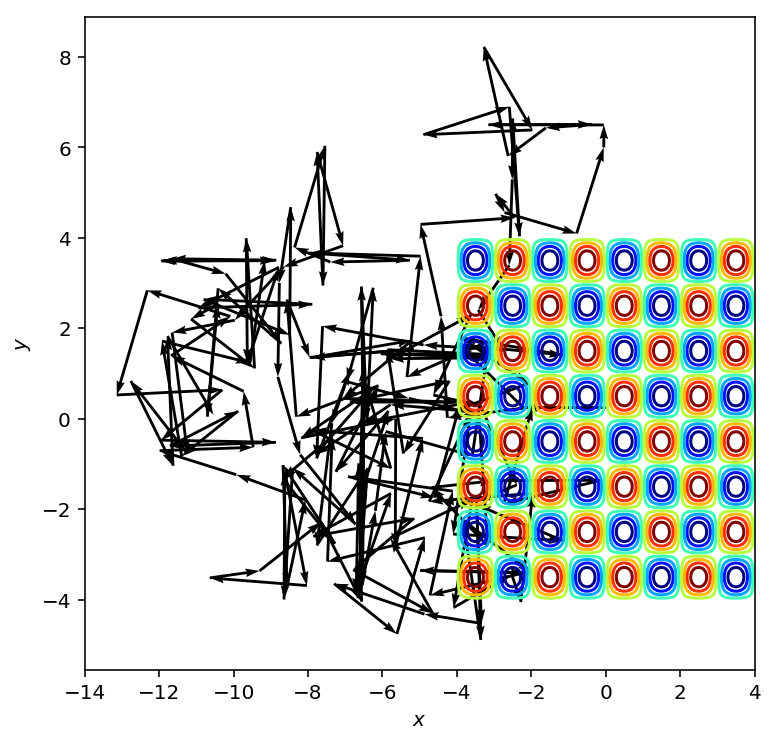

[-10.54131026   0.08981972] -0.3321872573364641


In [97]:
x0 = np.array([0, 0.249])
learning_rate = 1 #0.025
xopt, fopt, paths, fval_paths = steepest_descent_2d(f, grad_f_x, grad_f_y, x0, 
                                                    learning_rate=learning_rate, MaxIter=200, verbose=False)
contour_with_path(f, x, y, paths, norm=None, level=np.linspace(-1, 1, 10))
print(xopt, fopt)